In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check for missing values
data.isnull().mean()*100

In [6]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Standardize the numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data) # Scale only the numeric data

In [14]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_array = ohe.fit_transform(data[['Gender']]) # Pass the data as a DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
# Convert ohe_array to DataFrame
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(['Gender']))

# Reset index for both DataFrames to avoid potential misalignment issues
data_reset = data.reset_index(drop=True)
ohe_df_reset = ohe_df.reset_index(drop=True)

# Concatenate the one-hot encoded features with the original DataFrame
data_encoded = pd.concat([data_reset, ohe_df_reset], axis=1)

# Assuming 'data_scaled' is the scaled numeric data from previous steps
# Convert data_scaled to DataFrame and reset index
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_data.columns).reset_index(drop=True)

# Concatenate scaled numeric data with one-hot encoded data
data_final = pd.concat([data_scaled_df, ohe_df_reset], axis=1)

data_final.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.706091,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.688771,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.671450,-1.137502,-1.700830,1.040418,1.0,0.0
4,-1.654129,-0.563369,-1.662660,-0.395980,1.0,0.0


In [18]:
data_final.drop(columns='CustomerID', inplace=True)
data_final.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [19]:
data_final.isnull().mean()*100

Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
Gender_Female             0.0
Gender_Male               0.0
dtype: float64

## **Model Training**

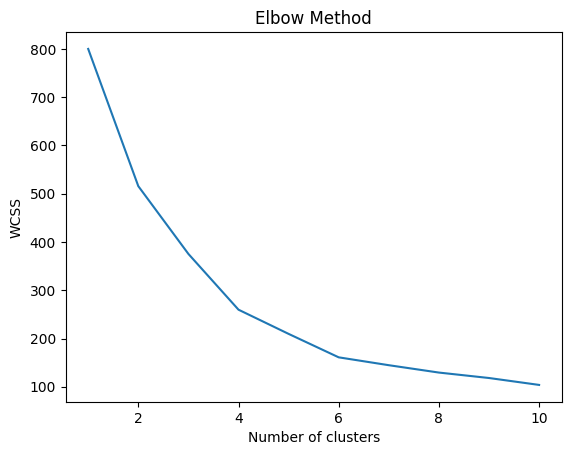

In [20]:
# Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [21]:
# Applying K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters


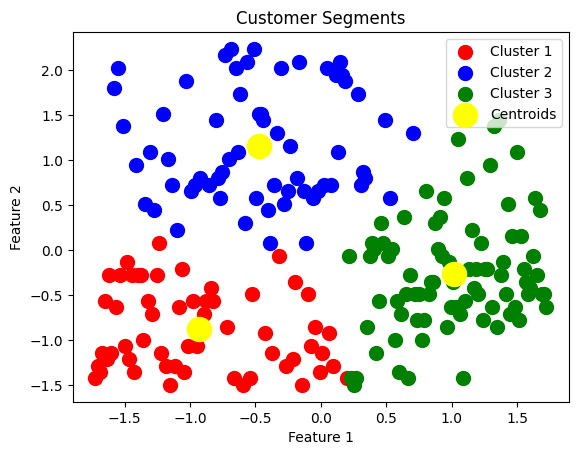

In [22]:
plt.scatter(data_scaled[clusters == 0, 0], data_scaled[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[clusters == 1, 0], data_scaled[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[clusters == 2, 0], data_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
